In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [151]:
insurance = pd.read_csv('insurance_claims.csv')

In [152]:
insurance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [153]:
insurance.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [154]:
null_counts = insurance.isnull().sum()
null_counts

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [155]:
insurance_new = insurance.drop("_c39", axis = 1)

In [156]:
insurance_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [157]:
if (insurance_new['months_as_customer'] == 0).any():
    print("There are rows with a value of zero in the specified column.")
else:
    print("There are no rows with a value of zero in the specified column.")

There are rows with a value of zero in the specified column.


In [158]:
rows_with_zero = insurance_new[insurance_new['months_as_customer'] == 0]
print(rows_with_zero)

     months_as_customer  age  policy_number policy_bind_date policy_state  \
497                   0   32         740518       2011-02-18           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
497   500/1000               1000                1377.04               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
497       441363  ...         1                      NO              39720   

    injury_claim property_claim  vehicle_claim  auto_make auto_model  \
497         6620           6620          26480     Accura        MDX   

    auto_year fraud_reported  
497      2002              N  

[1 rows x 39 columns]


In [159]:
insurance_new['months_as_customer'] = insurance_new['months_as_customer'].replace(0, 47)

In [160]:
insurance_new.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,204.001000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.039389,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,1.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


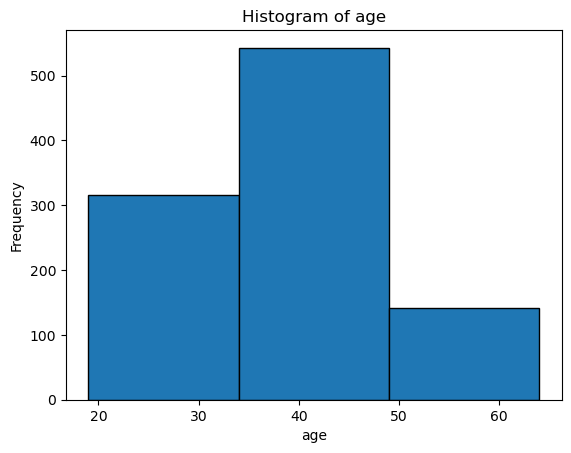

In [161]:
column_name = 'age'

plt.hist(insurance_new[column_name], bins=3, edgecolor='black')

plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

plt.show()

In [162]:
bin_edges = [0, 30, 55, 100]
bin_labels = ['Young Adult', 'Middle Aged', 'Elderly']

insurance_new['age_category'] = pd.cut(insurance_new['age'], bins=bin_edges, labels=bin_labels)

In [163]:
insurance_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,age_category
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,Middle Aged
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,Middle Aged
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,Young Adult
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,Middle Aged


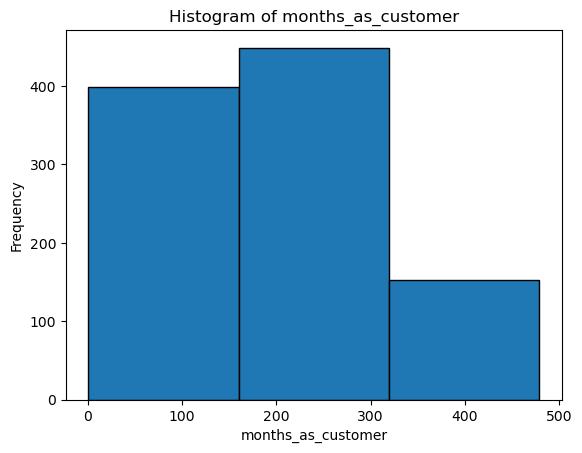

In [164]:
column_name = 'months_as_customer'

plt.hist(insurance_new[column_name], bins=3, edgecolor='black')

plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

plt.show()

In [165]:
bin_edges_customer = [0, 25, 150, 500] 
bin_labels_customer = ['New Client', 'Established Client', 'Long-Term Client']

insurance_new['customer_category'] = pd.cut(insurance_new['months_as_customer'], bins=bin_edges_customer, labels=bin_labels_customer)

In [166]:
insurance_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,age_category,customer_category
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,71610,6510,13020,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,5070,780,780,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,34650,7700,3850,23100,Dodge,RAM,2007,N,Young Adult,Established Client
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,6500,1300,650,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client


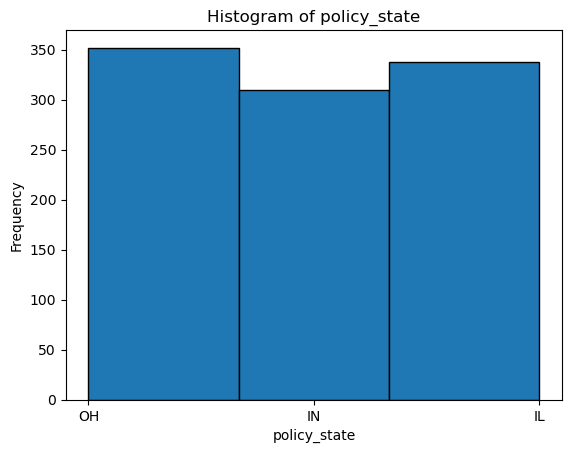

In [167]:
column_name = 'policy_state'

plt.hist(insurance_new[column_name], bins=3, edgecolor='black')

plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

plt.show()

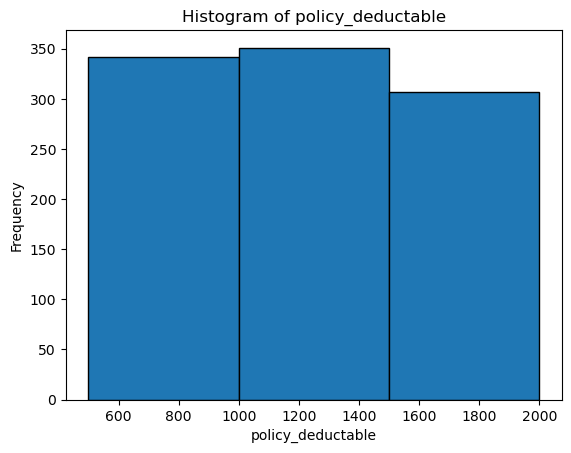

In [168]:
column_name = 'policy_deductable'

plt.hist(insurance_new[column_name], bins=3, edgecolor='black')

plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

plt.show()

In [169]:
bin_edges_customer = [0, 500, 1000, 2000] 
bin_labels_customer = ['Low', 'Medium', 'High']

insurance_new['deductable_category'] = pd.cut(insurance_new['policy_deductable'], bins=bin_edges_customer, labels=bin_labels_customer)

In [170]:
insurance_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,age_category,customer_category,deductable_category
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,6510,13020,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,Medium
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,780,780,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,High
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,7700,3850,23100,Dodge,RAM,2007,N,Young Adult,Established Client,High
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,High
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1300,650,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,Medium


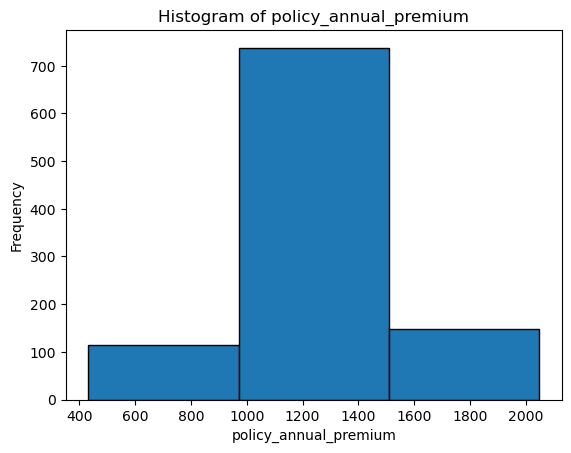

In [171]:
column_name = 'policy_annual_premium'

plt.hist(insurance_new[column_name], bins=3, edgecolor='black')

plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

plt.show()

In [172]:
bin_edges_customer = [0, 500, 1000, 2500] 
bin_labels_customer = ['Low', 'Medium', 'High']

insurance_new['annual_premium_category'] = pd.cut(insurance_new['policy_annual_premium'], bins=bin_edges_customer, labels=bin_labels_customer)

In [173]:
insurance_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,age_category,customer_category,deductable_category,annual_premium_category
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,13020,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,Medium,High
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,780,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,High,High
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3850,23100,Dodge,RAM,2007,N,Young Adult,Established Client,High,High
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,High,High
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,650,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,Medium,High


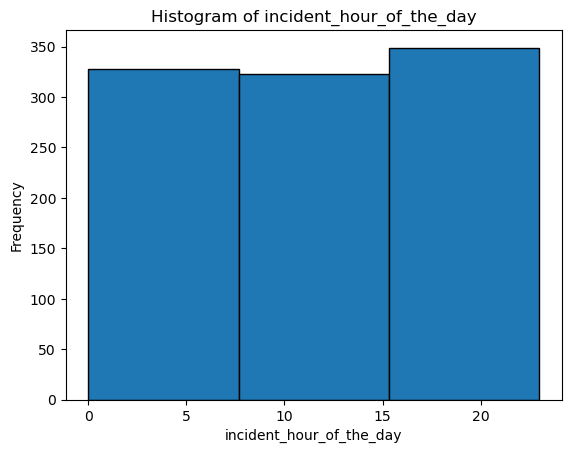

In [174]:
column_name = 'incident_hour_of_the_day'

plt.hist(insurance_new[column_name], bins=3, edgecolor='black')

plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

plt.show()

In [175]:
bin_edges_customer = [-1, 12, 17, 23] 
bin_labels_customer = ['Morning', 'Afternoon', 'Evening']

insurance_new['incident_time_category'] = pd.cut(insurance_new['incident_hour_of_the_day'], bins=bin_edges_customer, labels=bin_labels_customer) 

In [176]:
insurance_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,age_category,customer_category,deductable_category,annual_premium_category,incident_time_category
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,Medium,High,Morning
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,High,High,Morning
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,23100,Dodge,RAM,2007,N,Young Adult,Established Client,High,High,Morning
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,High,High,Morning
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,Medium,High,Evening


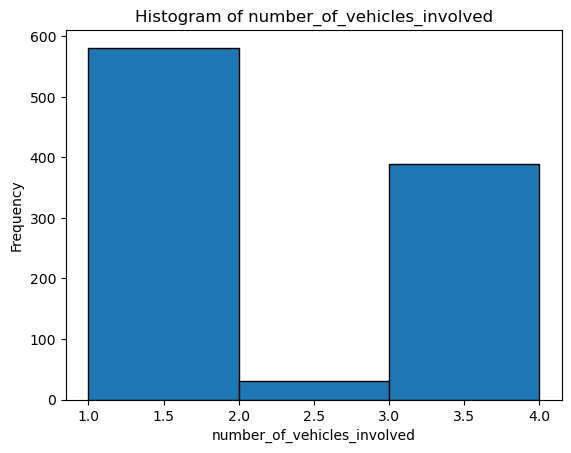

In [177]:
column_name = 'number_of_vehicles_involved'

plt.hist(insurance_new[column_name], bins=3, edgecolor='black')

plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

plt.show()

In [178]:
insurance_new["Contract Years"] = insurance_new["months_as_customer"]/12

In [179]:
insurance_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_make,auto_model,auto_year,fraud_reported,age_category,customer_category,deductable_category,annual_premium_category,incident_time_category,Contract Years
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,Saab,92x,2004,Y,Middle Aged,Long-Term Client,Medium,High,Morning,27.333333
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,High,High,Morning,19.000000
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,Dodge,RAM,2007,N,Young Adult,Established Client,High,High,Morning,11.166667
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,High,High,Morning,21.333333
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,Accura,RSX,2009,N,Middle Aged,Long-Term Client,Medium,High,Evening,19.000000


In [180]:
insurance_new['total_premiums_paid'] = (insurance_new['policy_annual_premium']/12) * insurance_new['months_as_customer']

In [181]:
insurance_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_model,auto_year,fraud_reported,age_category,customer_category,deductable_category,annual_premium_category,incident_time_category,Contract Years,total_premiums_paid
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,92x,2004,Y,Middle Aged,Long-Term Client,Medium,High,Morning,27.333333,38455.540000
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,E400,2007,Y,Middle Aged,Long-Term Client,High,High,Morning,19.000000,22747.180000
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,RAM,2007,N,Young Adult,Established Client,High,High,Morning,11.166667,15780.063333
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,Tahoe,2014,Y,Middle Aged,Long-Term Client,High,High,Morning,21.333333,30202.453333
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,RSX,2009,N,Middle Aged,Long-Term Client,Medium,High,Evening,19.000000,30094.290000


In [182]:
null_counts = insurance_new.isnull().sum()
null_counts

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [183]:
insurance_new.to_csv('Transformed Insurance Data.csv')